# Исследование связи факторов иммунизациии населения с продолжительностью жизни и причинами детской смертности

In [2]:
import sys
# Добавим папку проекта в список системных директорий, чтобы Python видел путь к папке utils
sys.path.append('..')

In [3]:
import pandas as pd
import plotly.express as px

from utils.constants import (
    F, 
    FieldSemanticCategory,
    fields,
)
from utils.graphics import (
    display_clusters_profiles,
    dislay_partial_correlation_matrix,
    show_and_save_fig,
)
from utils.display_content import (
    dislay_some_fields_description,
    display_fields_correlation,
)
from utils.prepare_data import (
    get_fields_by_semantic_category,
    move_column_to_end_table,
    add_child_mortality_data,
    get_temp_rename_dict,
    get_scaled_data,
)

from warnings import simplefilter
simplefilter('ignore')

In [4]:
# Загрузим таблицу
data_source = pd.read_csv('../data/cumulative_life_expectancy_prepared.csv')

data_source.head()

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,AdultMortality,Homicides,MaternalMortality,AdultNcdMortality,AdultNcdMortality117,...,Sanitation,DrinkingWater,HealthCareCosts,HealthCareCostsGdp,HealthCareCostsPerCapita,GdpPerCapita,Population,Schooling,ClusterKMeans,LifeExpectancy
0,AFR,Africa,AGO,Angola,2000,34.56,0.01331,0.859921,30.5,0.028126,...,27.56,41.14,2.74,1.11,7.66,563.733796,16194869.0,5.027188,1,49.37
1,AFR,Africa,AGO,Angola,2001,33.86,0.01310,0.799641,29.7,0.027503,...,28.99,42.25,5.97,2.05,13.35,533.586202,16747208.0,5.092250,1,50.06
2,AFR,Africa,AGO,Angola,2002,32.51,0.01288,0.758272,29.4,0.027049,...,30.42,43.38,4.19,1.31,11.54,882.147847,17327699.0,5.157312,1,51.06
3,AFR,Africa,AGO,Angola,2003,32.16,0.01265,0.676496,29.3,0.026962,...,31.86,44.36,4.26,1.47,14.55,992.698979,17943712.0,5.222375,1,51.74
4,AFR,Africa,AGO,Angola,2004,32.24,0.01229,0.594192,29.0,0.026300,...,33.29,45.35,5.66,1.69,21.36,1266.210864,18600423.0,5.287437,1,52.36


Оставим в таблице только те поля, которые будем рассматривать.

In [5]:
# Поля с данными об иммунизации 
immunization_fields = get_fields_by_semantic_category(
    FieldSemanticCategory.IMMUNIZATION.value,
)
# Поля с данными о кодах и названиях стран и регионов
country_naming_fields = get_fields_by_semantic_category(
    FieldSemanticCategory.COUNTRY_NAMING.value,
)

# Оставим в таблице только рассматриваемые поля
necessary_fields = country_naming_fields + [F.Period.value] + \
    immunization_fields + [F.ClusterKMeans.value, F.LifeExpectancy.value]

data = data_source[necessary_fields]

data.head()

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,HepatitisBImmunization,MeaslesImmunization,PolioImmunization,DiphtheriaImmunization,ClusterKMeans,LifeExpectancy
0,AFR,Africa,AGO,Angola,2000,85.285714,32.0,21.0,31.0,1,49.37
1,AFR,Africa,AGO,Angola,2001,70.444444,60.0,28.0,42.0,1,50.06
2,AFR,Africa,AGO,Angola,2002,71.000000,59.0,22.0,47.0,1,51.06
3,AFR,Africa,AGO,Angola,2003,73.043478,44.0,21.0,46.0,1,51.74
4,AFR,Africa,AGO,Angola,2004,79.615385,43.0,18.0,47.0,1,52.36


In [6]:
# Выведем описание полей
dislay_some_fields_description(necessary_fields)

**Описание полей:**

- `ParentLocationCode` - Код региона

- `ParentLocation` - Название региона

- `SpatialDimValueCode` - Код страны

- `Location` - Название страны

- `Period` - Год

- `HepatitisBImmunization` - Охват иммунизацией детей в возрасте 1 года против гепатита В (ГепВ3) (%)

- `MeaslesImmunization` - Охват первой дозой вакцины, содержащей коревой компонент (MCV1), среди детей в возрасте 1 года (%)

- `PolioImmunization` - Охват иммунизацией от полиомиелита (Pol3) среди детей в возрасте 1 года (%)

- `DiphtheriaImmunization` - Охват иммунизацией детей в возрасте 1 года дифтерийно-столбнячным анатоксином и коклюшем (АКДС3) (%)

- `ClusterKMeans` - Кластер страны, определенный с помощью k-means

- `LifeExpectancy` - Ожидаемая продоложительность жизни

## Корреляция данных об иммунизации с ожидаемой продолжительностью жизни

Построим тепловую карту корреляции рассматриваемых признаков и посмотрим на их взаимное влияние.

Построим матрицу корреляции.

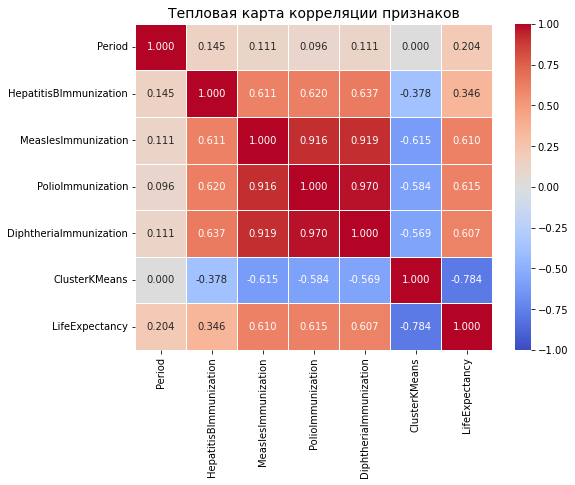

Посмотрим на пары признаков с коэффициентом корреляции больше, чем `0.7`

[(['MeaslesImmunization', 'PolioImmunization'], 0.92),
 (['MeaslesImmunization', 'DiphtheriaImmunization'], 0.92),
 (['PolioImmunization', 'DiphtheriaImmunization'], 0.97),
 (['ClusterKMeans', 'LifeExpectancy'], -0.78)]

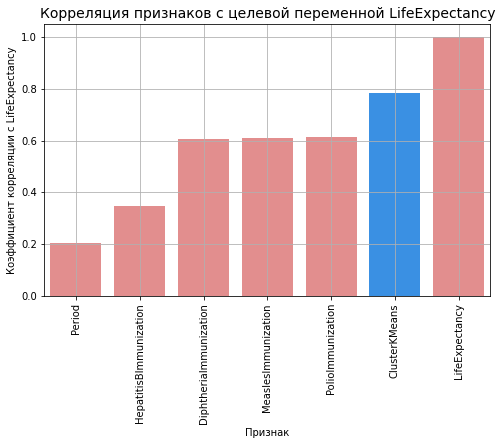

In [7]:
display_fields_correlation(
    data,
    matrix_figsize=(8, 6),
    barplot_figsize=(8, 5),
)

Есть сильная корреляция между различными видами иммунизации \
(`MeaslesImmunization`, `PolioImmunization`, `DiphtheriaImmunization`)\
Скорее всего причина в том, что эти прививки делают "пакетом", \
то есть они идут общим планом.

Менее скоррелирована с этими тремя иммунизация от гепатита B `HepatitisBImmunization`.\
Скорее всего, ее делают опционально.

По графику видно, что три типа иммунизации \
(`MeaslesImmunization`, `PolioImmunization`, `DiphtheriaImmunization`)\
имеют примерно равную корреляцию с продолжительностью жизни (0.607 - 0.615).

И меньшую корреляцию имеет признак `HepatitisBImmunization` - 0.346

## Исследование корреляции данных об иммунизации c причинами детской смертности

Посмотрим, как иммунизация коррелирует с данными о причинах детской смертности.\
На сайте [ВОЗ](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/distribution-of-causes-of-death-among-children-aged-5-years-(-)) данные были только с 2000 по 2017 гг.\
В качестве предикторов использовать их все равно не будем, потому что из этих данных формируется значение ожидаемой продолжительности жизни и они не известны для будущего.\
Но исследуем их.

In [8]:
# Добавим к основной таблице данные о причинах детской смертности
cumulative_data = add_child_mortality_data(data)

cumulative_data.head()

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,HepatitisBImmunization,MeaslesImmunization,PolioImmunization,DiphtheriaImmunization,ClusterKMeans,...,ChildUnder5Mortality8,ChildUnder5Mortality12,ChildUnder5Mortality3,ChildUnder5Mortality11,ChildUnder5Mortality13,ChildUnder5Mortality17,ChildUnder5Mortality9,ChildUnder5Mortality16,ChildUnder5Mortality15,ChildUnder5Mortality10
0,AFR,Africa,AGO,Angola,2000,85.285714,32.0,21.0,31.0,1,...,0.098,0.029,0.20,0.095,0.091,0.036,0.21,0.027,0.038,0.087
1,AFR,Africa,AGO,Angola,2001,70.444444,60.0,28.0,42.0,1,...,0.098,0.030,0.19,0.093,0.090,0.035,0.20,0.027,0.037,0.087
2,AFR,Africa,AGO,Angola,2002,71.000000,59.0,22.0,47.0,1,...,0.100,0.032,0.18,0.093,0.092,0.037,0.21,0.028,0.037,0.087
3,AFR,Africa,AGO,Angola,2003,73.043478,44.0,21.0,46.0,1,...,0.100,0.034,0.18,0.099,0.097,0.039,0.21,0.029,0.039,0.091
4,AFR,Africa,AGO,Angola,2004,79.615385,43.0,18.0,47.0,1,...,0.100,0.036,0.18,0.100,0.100,0.041,0.22,0.030,0.040,0.094


In [9]:
# Убедимся, что нет пропусков
cumulative_data.isna().sum().sum()

0

In [10]:
# Переставим столбец с целевой переменной продолжительности жизни в конец таблицы
cumulative_data = move_column_to_end_table(
    cumulative_data, F.LifeExpectancy.value
)

# Выведем описание столбцов
dislay_some_fields_description(
    list(cumulative_data.columns)
)

**Описание полей:**

- `ParentLocationCode` - Код региона

- `ParentLocation` - Название региона

- `SpatialDimValueCode` - Код страны

- `Location` - Название страны

- `Period` - Год

- `HepatitisBImmunization` - Охват иммунизацией детей в возрасте 1 года против гепатита В (ГепВ3) (%)

- `MeaslesImmunization` - Охват первой дозой вакцины, содержащей коревой компонент (MCV1), среди детей в возрасте 1 года (%)

- `PolioImmunization` - Охват иммунизацией от полиомиелита (Pol3) среди детей в возрасте 1 года (%)

- `DiphtheriaImmunization` - Охват иммунизацией детей в возрасте 1 года дифтерийно-столбнячным анатоксином и коклюшем (АКДС3) (%)

- `ClusterKMeans` - Кластер страны, определенный с помощью k-means

- `ChildUnder5Mortality2` - Распределение причин смерти среди детей в возрасте до 5 лет (%). ВИЧ/СПИД.

- `ChildUnder5Mortality5` - Распределение причин смерти среди детей в возрасте до 5 лет (%). Столбняк.

- `ChildUnder5Mortality6` - Распределение причин смерти среди детей в возрасте до 5 лет (%). Корь.

- `ChildUnder5Mortality7` - Распределение причин смерти среди детей в возрасте до 5 лет (%). Менингит/энцефалит.

- `ChildUnder5Mortality8` - Распределение причин смерти среди детей в возрасте до 5 лет (%). Малярия.

- `ChildUnder5Mortality12` - Распределение причин смерти среди детей в возрасте до 5 лет (%). Сепсис и другие инфекционные состояния новорожденных.

- `ChildUnder5Mortality3` - Распределение причин смерти среди детей в возрасте до 5 лет (%). Диарейные заболевания.

- `ChildUnder5Mortality11` - Распределение причин смерти среди детей в возрасте до 5 лет (%). Родовая асфиксия и родовая травма.

- `ChildUnder5Mortality13` - Распределение причин смерти среди детей в возрасте до 5 лет (%). Другие инфекционные, перинатальные и алиментарные состояния.

- `ChildUnder5Mortality17` - Распределение причин смерти среди детей в возрасте до 5 лет (%). Травмы.

- `ChildUnder5Mortality9` - Распределение причин смерти среди детей в возрасте до 5 лет (%). Острые инфекции нижних дыхательных путей.

- `ChildUnder5Mortality16` - Распределение причин смерти среди детей в возрасте до 5 лет (%). Другие неинфекционные заболевания.

- `ChildUnder5Mortality15` - Распределение причин смерти среди детей в возрасте до 5 лет (%). Врожденные аномалии.

- `ChildUnder5Mortality10` - Распределение причин смерти среди детей в возрасте до 5 лет (%). Недоношенность.

- `LifeExpectancy` - Ожидаемая продоложительность жизни

Посмотрим на корреляцию факторов иммунизации и причин детской смертности.

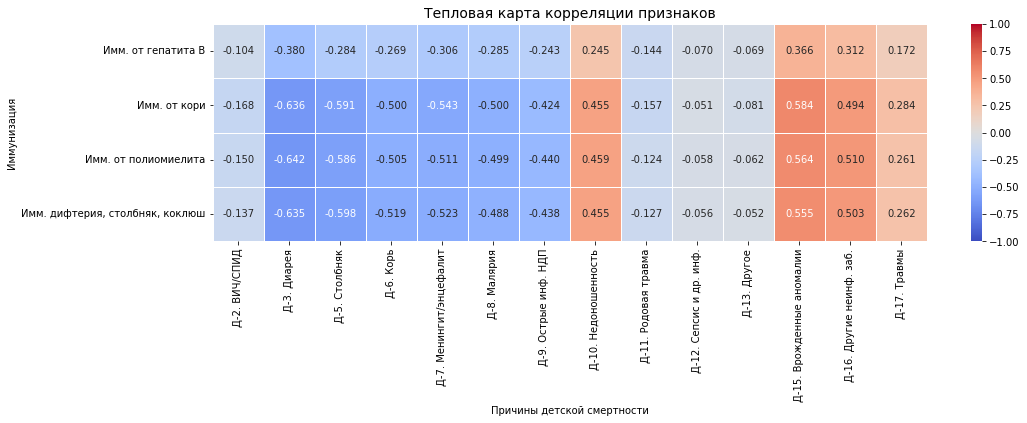

In [11]:
dislay_partial_correlation_matrix(
    cumulative_data,
    columns_features=get_fields_by_semantic_category(FieldSemanticCategory.CHILD_MORTALITY.value),
    rows_features=get_fields_by_semantic_category(FieldSemanticCategory.IMMUNIZATION.value),
    figsize=(16, 4),
    xlabel='Причины детской смертности',
    ylabel='Иммунизация',
)

По графику можно увидеть, что факторы иммунизации\
имеют похожую корреляцию со всеми причинами смертности детей до 5 лет.\
Менее выраженную корреляцию имеет фактор иммунизации от гепатита Б.

Корреляция факторов иммунизации от кори и смертности детей до 5 лет от кори равна -0.5 \
То есть, эффект от иммунизации есть.

Также отрицательную корреляцию в районе -0.5 с факторами иммунизации имеют следующие причины смертности:
- Столбняк
- Менингит/энцефалит
- Малярия
- Диарея
- Острые инфекции нижних дыхательных путей (здесь ближе к 0.4)

То есть чем выше процент иммунизации, тем меньше детской смертности от инфекционных заболеваний.

Положительную корреляцию в районе 0.5 с факторами иммунизации имеют такие причины смертности:
- Другие неинфекционные заболевания
- Врожденные аномалии
- Недоношенность

Эти три фактора также положительно коррелируют с ожидаемой продолжительностью жизни.\
Их, пожалуй, можно отнести к проблемам, больше проявляющимся в благополучных странах.\
Которые проявляются, если смертность не возникает раньше от других причин.

## Охват иммунизацией в различных странах

Поскольку  факторы иммунизации от кори, полиомелита и дифтерии имеют высокую корреляцию между собой,\
можно предположить, что их делают обычно вместе.\
Поэтому возьмем среднее по этим трем признакам, а также среднее по факторам смертности от инфекционных заболеваний и посмотрим на ситуацию в разных странах.

In [12]:
# Поля с данными об иммунизации
base_immunization_fields = [
    F.MeaslesImmunization.value, # Иммунизация от кори
    F.PolioImmunization.value, # Иммунизация от полиомелита
    F.DiphtheriaImmunization.value, # Иммунизация от дифтерии
]

# Поля с данными о детской смертности от инфекционных заболеваний
child_infection_mortality_fields = [
    F.ChildUnder5Mortality5.value, # Столбняк
    F.ChildUnder5Mortality7.value, # Менингит/энцефалит 
    F.ChildUnder5Mortality8.value, # Малярия
    F.ChildUnder5Mortality3.value, # Диарея
    F.ChildUnder5Mortality9.value, # Острые инфекции нижних дыхательных путей
    F.ChildUnder5Mortality6.value, # Корь
    F.ChildUnder5Mortality12.value, # Сепсис и другие инфекционные состояния новорожденных
    F.ChildUnder5Mortality13.value, # Другие инфекционные, перинатальные и алиментарные состояния
]

# Среднее по факторам иммунизации
cumulative_data['ImmunizationMean'] = \
    cumulative_data[base_immunization_fields].mean(axis=1)  

# Среднее по факторам смертности от инфекционных заболеваний
cumulative_data['ChildUnder5InfectionMortalityMean'] = \
    cumulative_data[child_infection_mortality_fields].mean(axis=1)  

In [13]:
fig = px.choropleth(
    cumulative_data, 
    locations=F.SpatialDimValueCode.value, 
    color='ImmunizationMean',
    hover_name=F.Location.value,
    projection='natural earth',
    animation_frame=F.Period.value,
    width=1000,
    height=700,
    title='Охват иммунизацией от кори, дифтерии и полиомиелита среди детей в возрасте 1 года (%)',
)

show_and_save_fig(fig, 'immunization_locations_mean')

По графику видно, что ситуация по годам меняется, но как в лучшую, так и в худшую сторону.

In [14]:
fig = px.choropleth(
    cumulative_data, 
    locations=F.SpatialDimValueCode.value, 
    color='ChildUnder5InfectionMortalityMean',
    hover_name=F.Location.value,
    projection='natural earth',
    animation_frame=F.Period.value,
    width=1000,
    height=700,
    title='Смертность от инфекционных заболеваний детей до 5 лет (%)',
)

show_and_save_fig(fig, 'immunization_infection_mortality_earh')

По графику видно, что за рассматриваемые годы ситуация в мире в целом одинакова.\
Высокий процент детской смертности в Африке.

Посчитаем среднее значение по годам для всех стран и посмотрим, в каких странах показатель иммунизации имеет наибольшие и наименьшие значения.

In [15]:
mean_immunization_data = cumulative_data.groupby(F.Location.value).agg(
    ImmunizationMean=('ImmunizationMean', 'mean'),
    ChildUnder5InfectionMortalityMean=('ChildUnder5InfectionMortalityMean', 'mean'),
    LifeExpectancyMean=(F.LifeExpectancy.value, 'mean')
).reset_index().sort_values(by='ImmunizationMean')

print('Страны с наименьшим охватом иммунизацией')
mean_immunization_data.head(3)

Страны с наименьшим охватом иммунизацией


,Location,ImmunizationMean,ChildUnder5InfectionMortalityMean,LifeExpectancyMean
32,Chad,36.148148,0.086236,54.805000
149,Somalia,39.796296,0.087507,50.457778
118,Nigeria,44.092593,0.083326,58.619444


In [16]:
print('Страны с наибольшим охватом иммунизацией')
mean_immunization_data.tail(3)

Страны с наибольшим охватом иммунизацией


,Location,ImmunizationMean,ChildUnder5InfectionMortalityMean,LifeExpectancyMean
152,Sri Lanka,98.518519,0.033472,74.059444
121,Oman,98.611111,0.027799,73.232222
72,Hungary,98.981481,0.015597,74.052222


Наименьшее значение показателя иммунизации в Чад и наибольшее в Венгрии.

In [17]:
# Отобразим данные на графике
fig = px.scatter(
    mean_immunization_data,
    x='ImmunizationMean', 
    y='ChildUnder5InfectionMortalityMean',
    hover_name='Location',
    color='LifeExpectancyMean',    
    height=600,    
)

fig.update_layout(
    title='Зависимость смертности детей до 5 лет от инфекционных заболеваний от иммунизации',
    xaxis_title='Охват иммунизацией от кори, дифтерии и полиомиелита среди детей в возрасте 1 года (%)',
    yaxis_title='Смертность детей в возрасте до 5 лет от инфекционных заболеваний (%)',
)

show_and_save_fig(fig, 'immunization_infection_mortality_scatter')

По графику видно, что чем меньше охват иммунизацией, тем выше процент детской смертности.\
И наоборот, чем ближе к 100% охват иммунизацией, тем меньше процент детской смертности.\
Также по цвету точек видно, что продолжительность жизни больше для второго случая и меньше для первого.

## Исследование влияния финансирование здравоохранения на иммунизацию населения

Есть предположение, что чем больше финансов выделяется на здравоохранение, тем больше охват иммунизацией.\
Проверим это.

In [18]:
# Поля с данными о финансировании здравоохранения
health_care_costs_fields = [
    F.HealthCareCosts.value,
    F.HealthCareCostsGdp.value,
    F.HealthCareCostsPerCapita.value,
]

# Оставим в таблице только рассматриваемые поля
necessary_fields = health_care_costs_fields + immunization_fields
    
immunization_costs_data = data_source[necessary_fields]

immunization_costs_data.head()

,HealthCareCosts,HealthCareCostsGdp,HealthCareCostsPerCapita,HepatitisBImmunization,MeaslesImmunization,PolioImmunization,DiphtheriaImmunization
0,2.74,1.11,7.66,85.285714,32.0,21.0,31.0
1,5.97,2.05,13.35,70.444444,60.0,28.0,42.0
2,4.19,1.31,11.54,71.000000,59.0,22.0,47.0
3,4.26,1.47,14.55,73.043478,44.0,21.0,46.0
4,5.66,1.69,21.36,79.615385,43.0,18.0,47.0


In [19]:
# Вспомним описание полей с данными о финансировании здравоохранения
dislay_some_fields_description(
    health_care_costs_fields, 
    title='Факторы финансирования здравоохранения'
)

**Факторы финансирования здравоохранения:**

- `HealthCareCosts` - Общие внутренние государственные расходы на здравоохранение в процентах от общих государственных расходов (%)

- `HealthCareCostsGdp` - Общие внутренние государственные расходы на здравоохранение в процентах от валового внутреннего продукта (ВВП) (%)

- `HealthCareCostsPerCapita` - Общие внутренние государственные расходы на здравоохранение на душу населения в долларах США

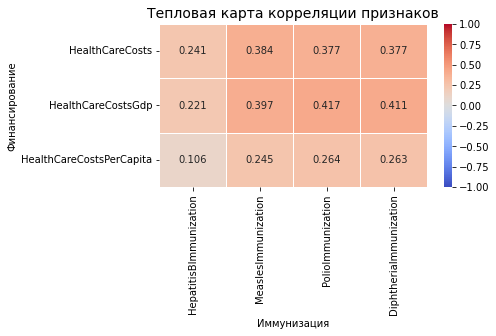

In [20]:
dislay_partial_correlation_matrix(
    immunization_costs_data,
    columns_features=immunization_fields,
    rows_features=health_care_costs_fields,
    should_rename=False,
    figsize=(6, 3),
    xlabel='Иммунизация',
    ylabel='Финансирование',
)

По графику видно, что положительная корреляция между факторами финансирования и иммунизацией есть, но слабая.

## Сравнение средних показателей иммунизации и причин детской смертности в кластерах стран

In [21]:
# Поля с данными о травмах
injuries_fields = [
    F.ChildUnder5Mortality11.value, # Родовая асфиксия и родовая травма
    F.ChildUnder5Mortality17.value, # Травмы
]

# Среднее по травмам
cumulative_data['ChildUnder5InjuriesMortalityMean'] = \
    cumulative_data[injuries_fields].mean(axis=1)  

# Удалим из таблицы поля, по которым взяли среднее
fields_to_drop = child_infection_mortality_fields + base_immunization_fields + injuries_fields
research_data = cumulative_data.drop(columns=fields_to_drop)

# Посмотрим на оставшиеся поля
research_data.head()

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,HepatitisBImmunization,ClusterKMeans,ChildUnder5Mortality2,ChildUnder5Mortality16,ChildUnder5Mortality15,ChildUnder5Mortality10,LifeExpectancy,ImmunizationMean,ChildUnder5InfectionMortalityMean,ChildUnder5InjuriesMortalityMean
0,AFR,Africa,AGO,Angola,2000,85.285714,1,0.007,0.027,0.038,0.087,49.37,28.000000,0.088375,0.0655
1,AFR,Africa,AGO,Angola,2001,70.444444,1,0.008,0.027,0.037,0.087,50.06,43.333333,0.088875,0.0640
2,AFR,Africa,AGO,Angola,2002,71.000000,1,0.009,0.028,0.037,0.087,51.06,42.666667,0.088625,0.0650
3,AFR,Africa,AGO,Angola,2003,73.043478,1,0.010,0.029,0.039,0.091,51.74,37.000000,0.085625,0.0690
4,AFR,Africa,AGO,Angola,2004,79.615385,1,0.012,0.030,0.040,0.094,52.36,36.000000,0.085288,0.0705


In [22]:
# Для построения графика масштабируем данные
research_scaled_data = get_scaled_data(research_data)

# Для удобства просмотра графика временно переименуем поля на русский
rename_dict = get_temp_rename_dict(research_data)
rename_dict_custom = {
    F.LifeExpectancy.value: 'Продолжительность жизни',
    'ImmunizationMean': 'Базовая иммунизация',
    'ChildUnder5InfectionMortalityMean': 'Д. Инф. заболевания',
    'ChildUnder5InjuriesMortalityMean': 'Д. Травмы'
}
rename_dict = dict(list(rename_dict.items()) + list(rename_dict_custom.items()))

# Построим полярную диаграмму
display_clusters_profiles(    
    research_scaled_data.groupby(F.ClusterKMeans.value).agg('mean').rename(columns=rename_dict),
    file_name='clusters_profiles_05', 
    title='Сравнение средних показателей иммунизации и причин детской смертности в кластерах стран',
    should_display_table=False,
    is_custom_size=False,
)

По графику видно, что в кластере с менее благополучными странами более часты случаи детской смертности от инфекционных заболеваний.\
Иммунизация в кластере благополучных стран выше.

Показатели по другим причинам детской смертности в кластере с благополучными странами выше (кроме ВИЧ/СПИД) выше.\
Возможно, это связано с тем, что в менее благополучных странах эти проблемы не проявляются, так как смертность наступает раньше от инфекционных заболеваний.

## Выводы

- Факторы иммунизации имеют отрицательную корреляцию с детской смертностью от инфекционных заболеваний.\
То есть, уменьшают ее.\
Также иммунизация имеет положительную корреляцию с продолжительностью жизни.

- Факторы иммунизации имеют слабую корреляцию с факторами финансирования здравоохранения.